# Real life Example- Refurbished Car Sale Service

In [1]:
# Import relevent libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import set_config as setcon
import seaborn as sns
setcon(print_changed_only=False)
sns.set()

## Loading the raw data

In [2]:
# load raw data into pandas dataframe
raw_data=pd.read_csv(r"datasets/4.Car Resell price prediction.csv")

In [3]:
# look into first 5 rows
raw_data.head()

,Brand,Price $,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Preprocessing

In [4]:
# find total null values in dataset
raw_data.isnull().sum()

Brand             0
Price $         172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [5]:
# check summary of dataset
raw_data.describe(include="all")

,Brand,Price $,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Determine the variables of interest

In [6]:
# there are 312 no of models of cars, so our first assumption is \
# that model doesn't put that much weight as we have already considered brand.
# Drop model column
data=raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price $,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Dealing with missing values

In [7]:
# Check for null values
data.isnull().sum()

Brand             0
Price $         172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [8]:
# it's not always recommanded to drop missing values but it's okay if we doesnt loose more than 5% of data.
# Drop missing value columns
data_no_mv=data.dropna(axis=0)

In [9]:
# Recheck for missing values
data_no_mv.isnull().sum()

Brand           0
Price $         0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [10]:
data_no_mv.describe(include='all')

,Brand,Price $,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


## Exploring the PDFs

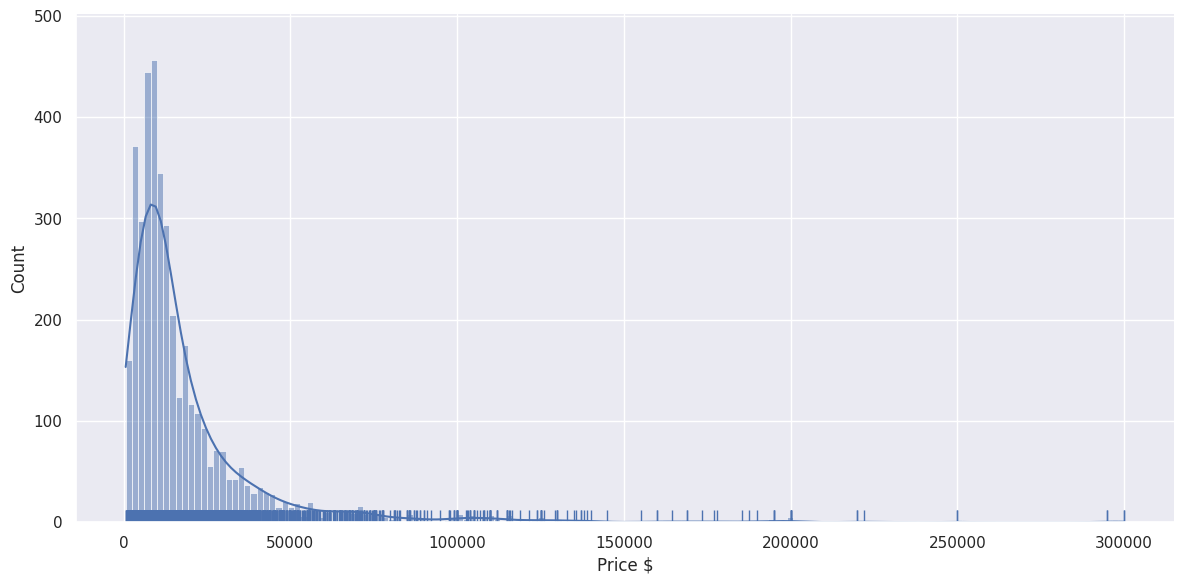

In [11]:
# Plot histogram of price of cars, to visualy check car prices
sns.displot(data_no_mv['Price $'],height=6,aspect=2,kind='hist',kde=True,rug=True)

### As We can see there are some outliers

## Dealing with outliers

In [12]:
# remove 1% where car prices are highest
q=data_no_mv['Price $'].quantile(0.99)
data_1=data_no_mv[data_no_mv['Price $']<q]
data_1.describe(include='all')

,Brand,Price $,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


### Price histogram after removing outliers

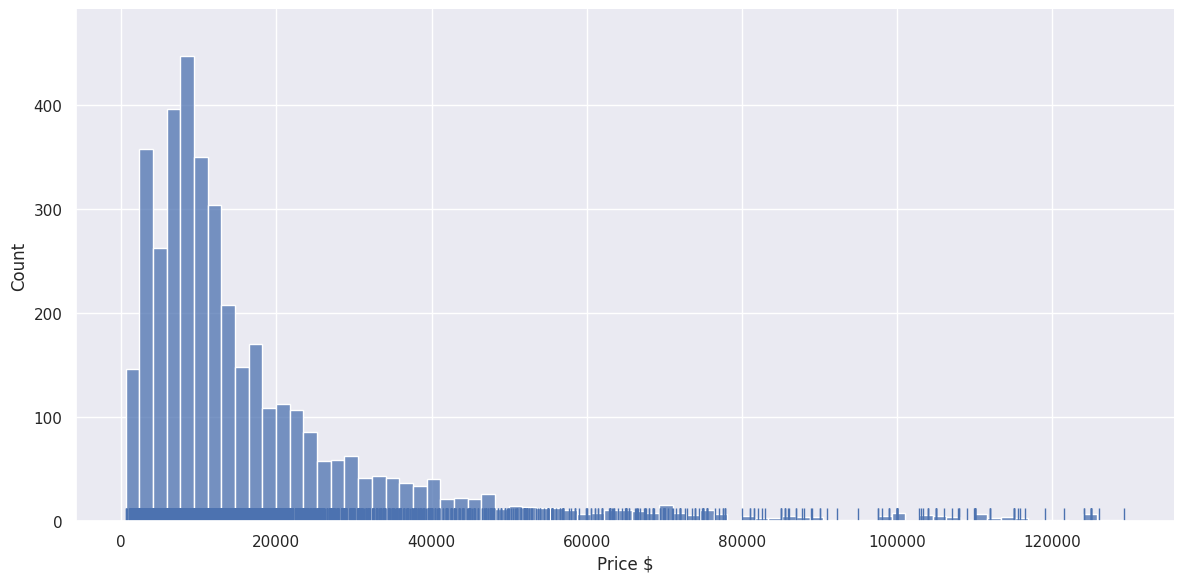

In [13]:
# Recheck for outliers after removing 1% outliers
sns.displot(data_1['Price $'],height=6,aspect=2,kind='hist',rug=True)
# Max price of cars has dropped from 30,000 to 12,000

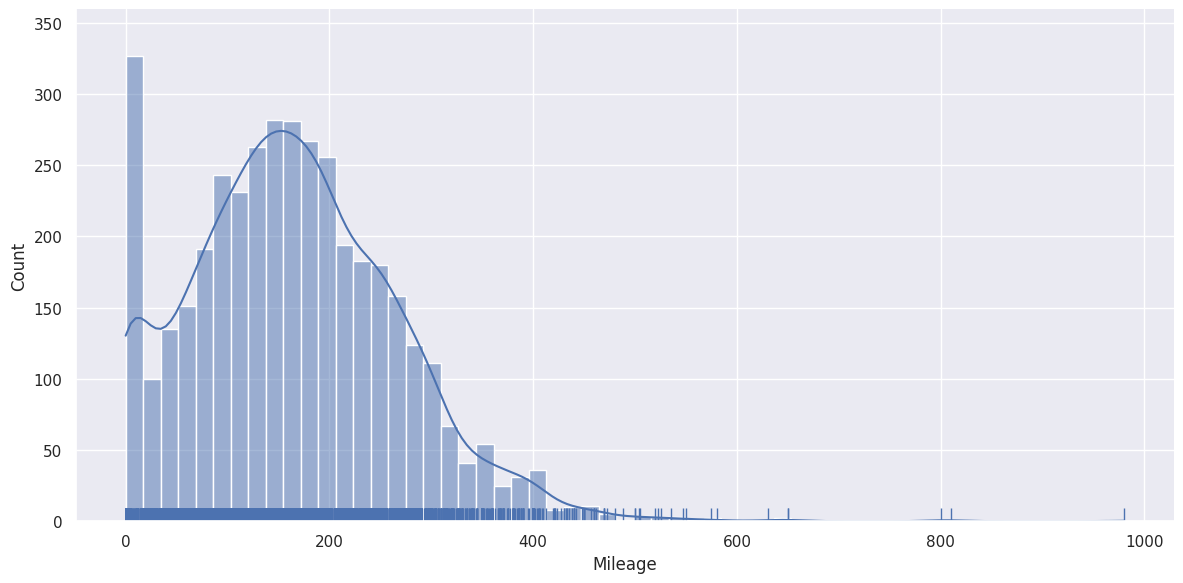

In [14]:
# Similarly check for Mileage
sns.displot(data_1['Mileage'],height=6,aspect=2,kind='hist',kde=True,rug=True)  #data_no_mv['Mileage']

## To remove outliers we are using quantile methods

In [15]:
# remove 1%
q=data_1['Mileage'].quantile(0.99)
data_2=data_1[data_1['Mileage']<q]
data_2.describe(include='all')

,Brand,Price $,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


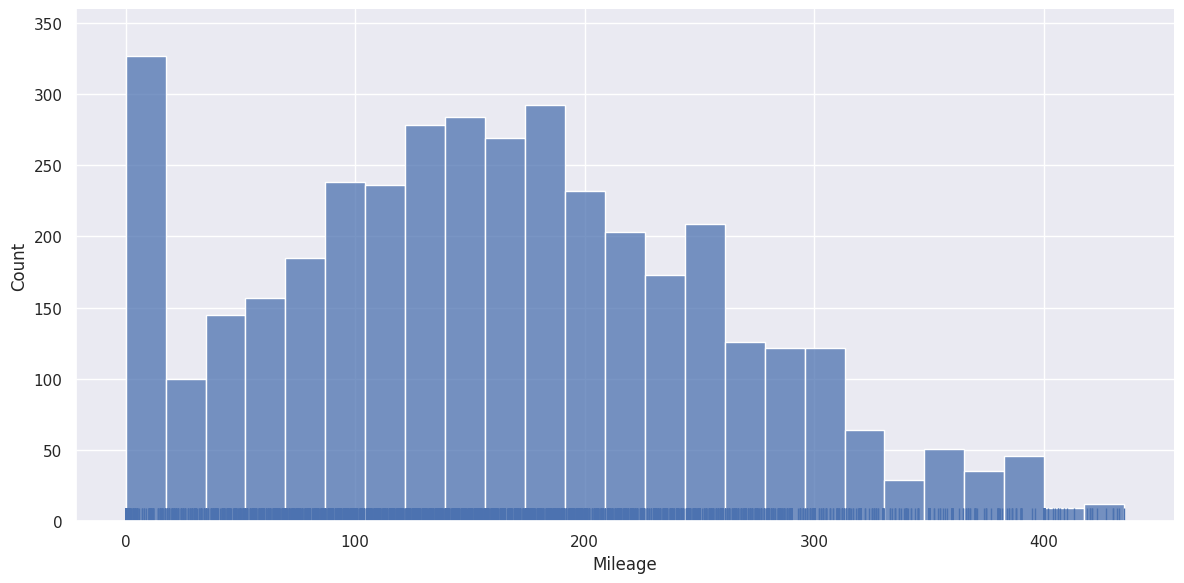

In [16]:
sns.displot(data_2['Mileage'],height=6,aspect=2,kind='hist',rug=True)

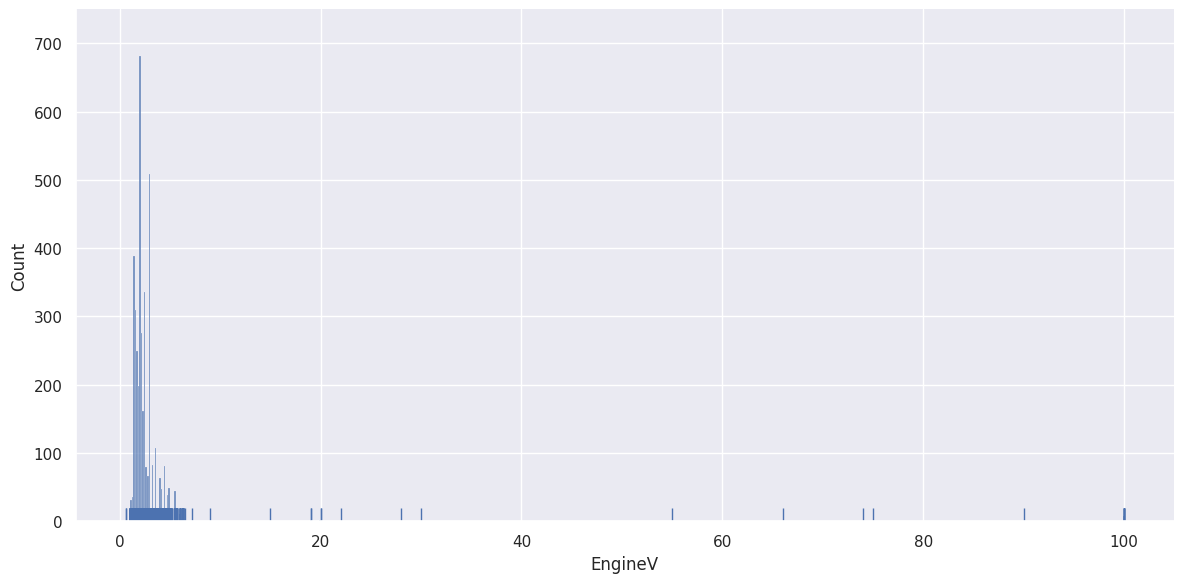

In [17]:
# Check engine volume histogram
sns.displot(data_2['EngineV'],height=6,aspect=2,kind='hist',rug=True)

### Engine volume falls between 0.6 and 6.5 liters, so very high values must be incorrect entries, (Search on google)

In [18]:
# remove wrong data columns
data_3=data_2[data_2['EngineV']<6.5]

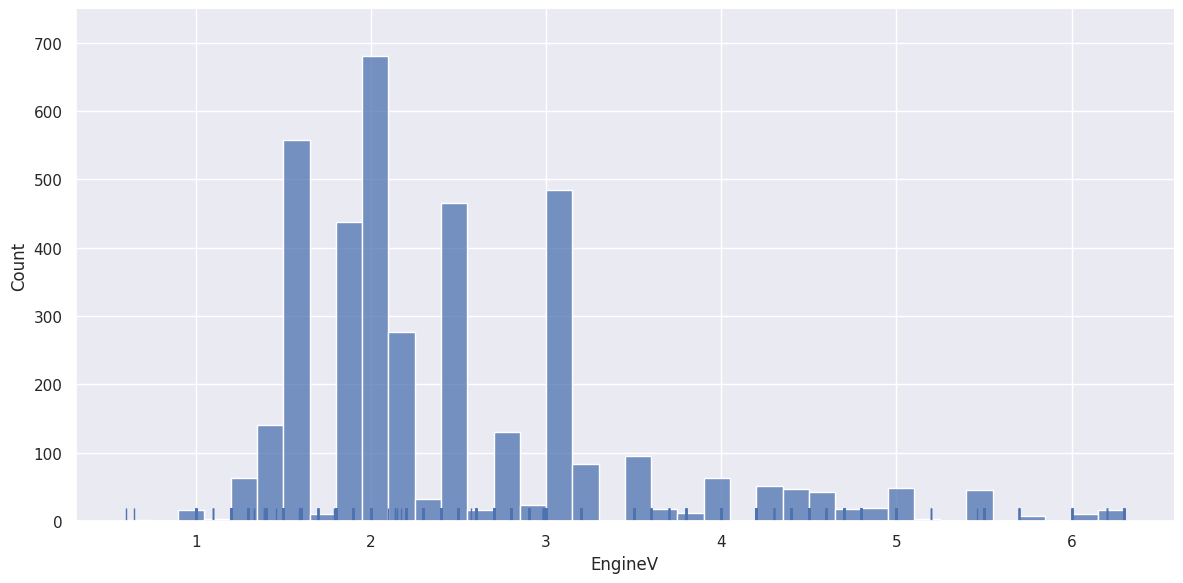

In [19]:
sns.displot(data_3['EngineV'],height=6,aspect=2,kind='hist',rug=True)

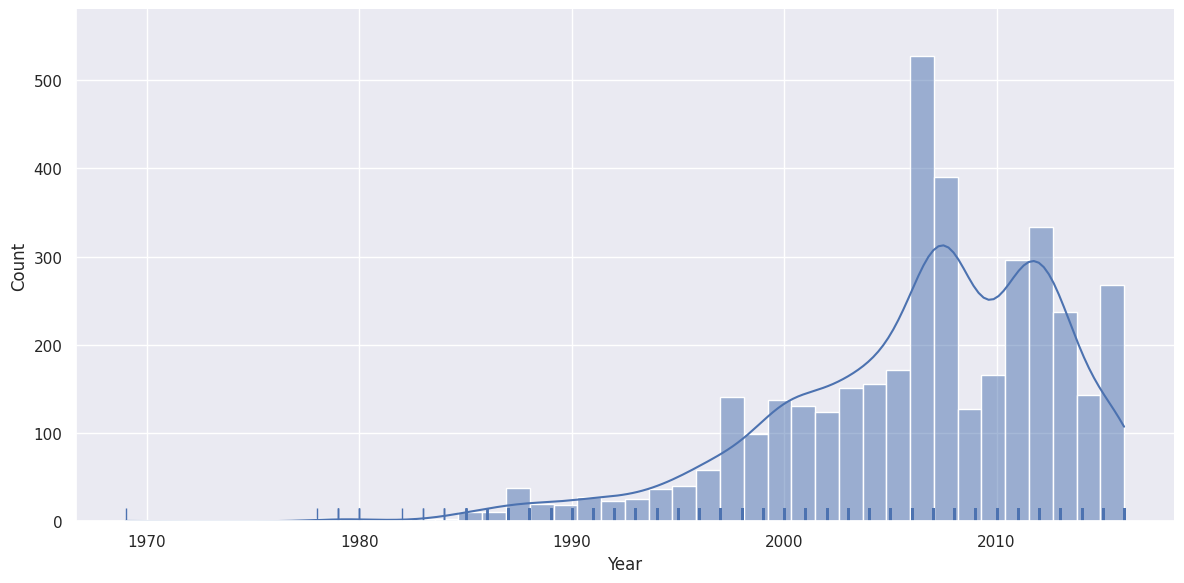

In [20]:
# check year of manufacturing of cars
sns.displot(data_3['Year'],height=6,aspect=2,kind='hist',kde=True,rug=True)

### Very old data are not useful for us as that may contain vintage cars and scraps as well, so we are removing vintage and scrap cars using quantile method

In [21]:
# remove vintage cars as they can be unique cars as well as scrap,
#  and that randomness can not be calculated by our model
q=data_3['Year'].quantile(0.01)
data_4=data_3[data_3['Year']>q]

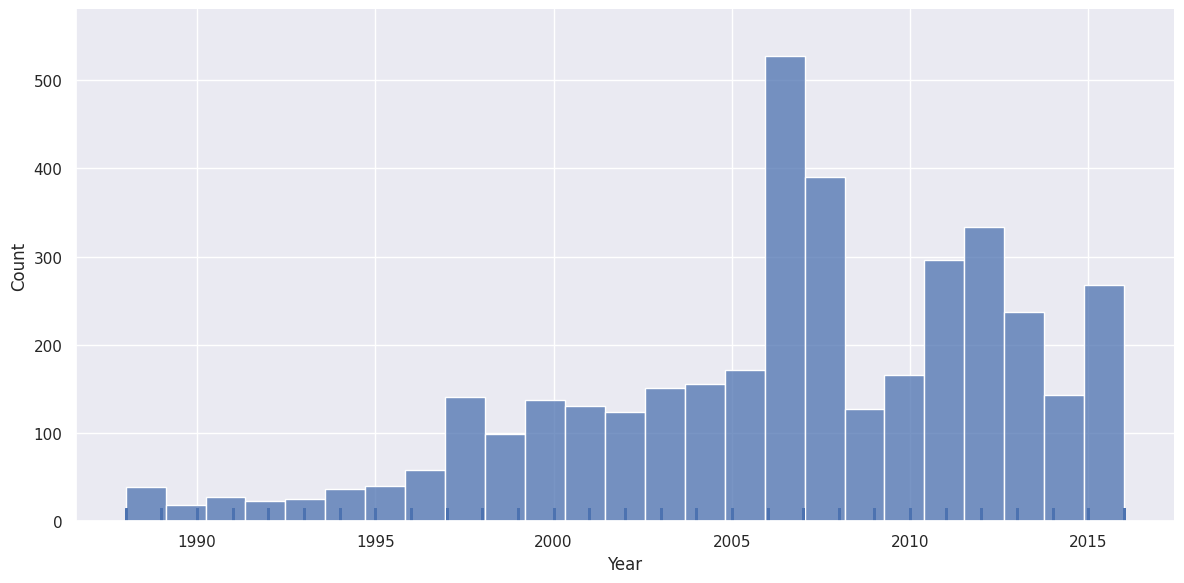

In [22]:
sns.displot(data_4['Year'],height=6,aspect=2,kind='hist',rug=True)

In [23]:
data_cleaned=data_4.reset_index(drop=True)

In [24]:
data_cleaned.head()

,Brand,Price $,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [25]:
data_4.describe(include='all')

,Brand,Price $,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


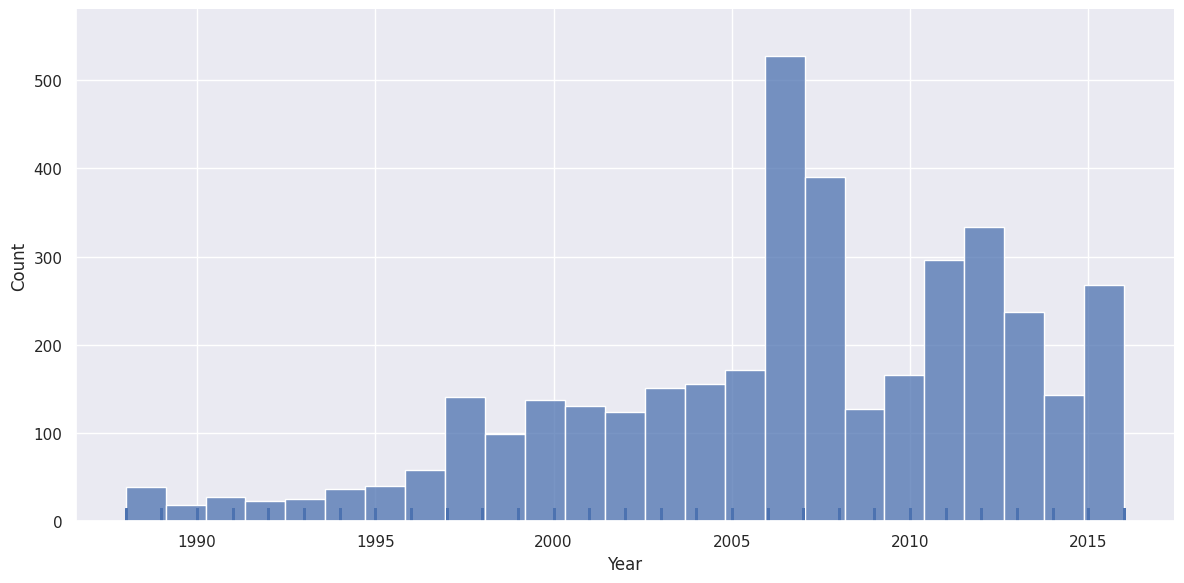

In [26]:
sns.displot(data_cleaned['Year'],height=6,aspect=2,kind='hist',rug=True)

### Checking the OLS assumptions (Ordinary least square assumptions of our dataset)
1. Linearity: Our dataset must be linear in nature
1. Normally distributed and Homoscendacity: Data must be normally distributed and variance is constant through out the data. 
2. No endogeneity: error term must not be collinear with target variable
3. No autocorrelation: value of individual must not depend on other values of the same columns
4. No multicollinearity: similar features must be excluded (one column value must not depend on other one)

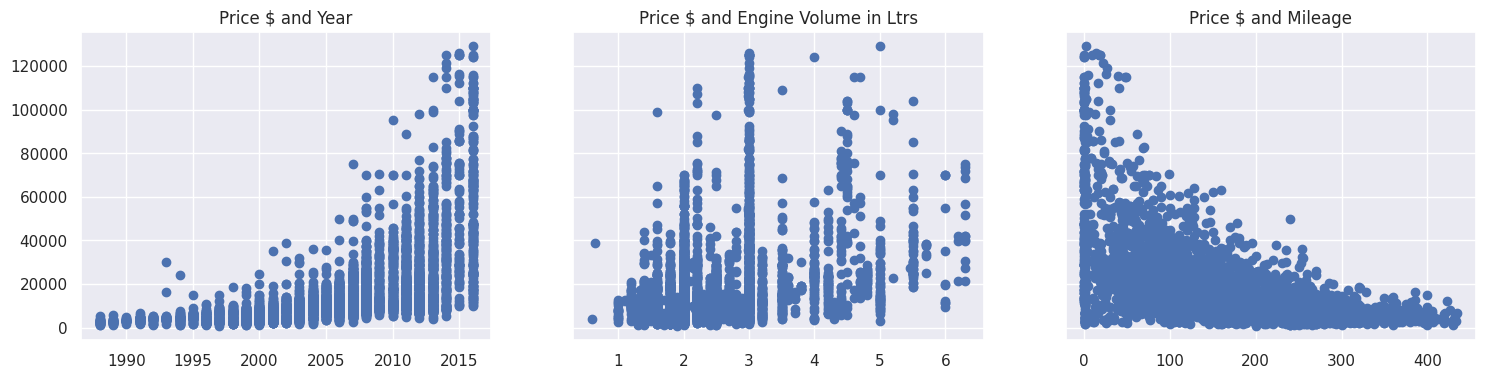

In [27]:
# Check pattern of our features
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(18,4))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price $'])
ax1.set_title(('Price $ and Year'))
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price $'])
ax2.set_title(('Price $ and Engine Volume in Ltrs'))
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price $'])
ax3.set_title(('Price $ and Mileage'))

plt.show()

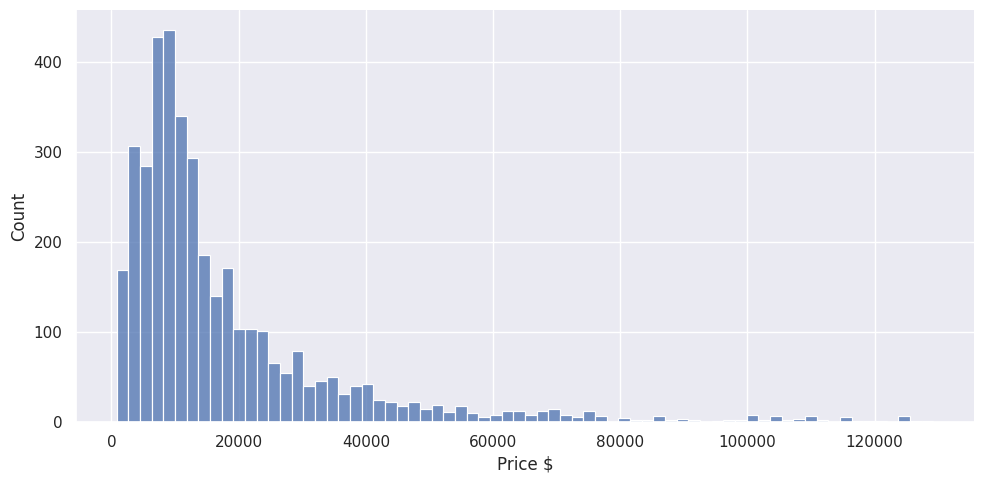

In [28]:
sns.displot(data_cleaned['Price $'],height=5,aspect=2)

- As we can see that price is not normally distributed, we can not use regression analysis directly

### **Relaxing the assumptions**

### 1.Relaxing linearity and normality

In [29]:
log_price=np.log(data_cleaned['Price $'])
data_cleaned['log_price']=log_price
data_cleaned

,Brand,Price $,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


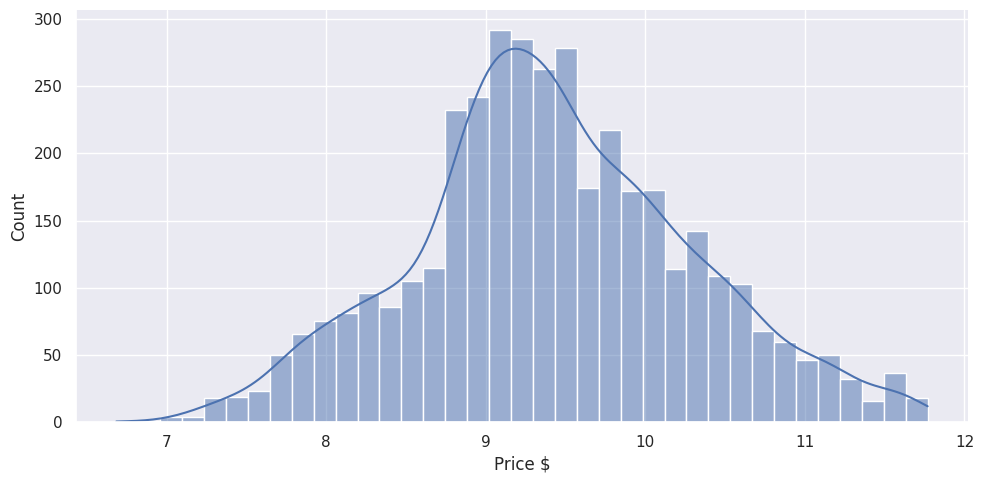

In [30]:
sns.displot(log_price,height=5,aspect=2,kde=True)

- Prices are more normally distributed then before

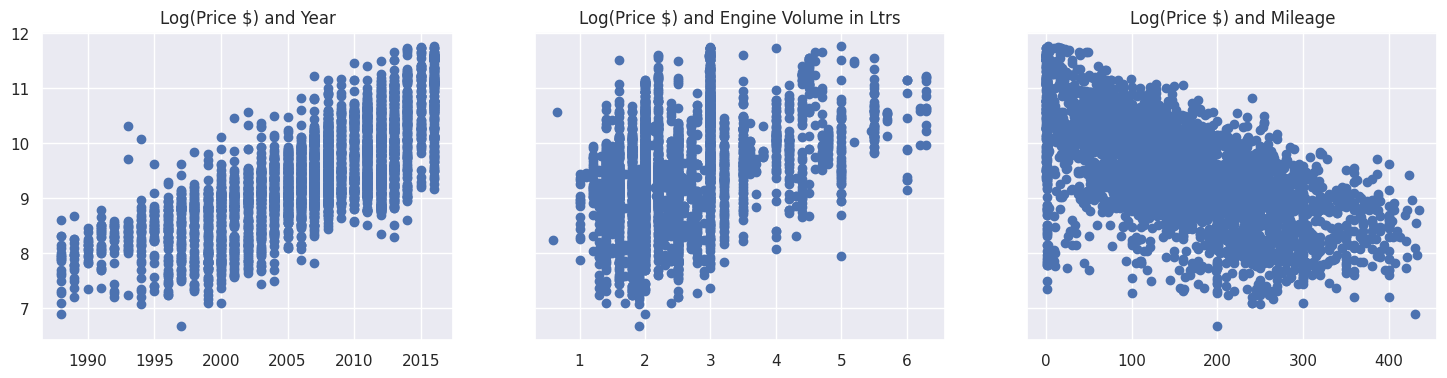

In [31]:
# Check patterns of our features after linearity relaxation

f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(18,4))
ax1.scatter(data_cleaned['Year'],log_price)
ax1.set_title(('Log(Price $) and Year'))
ax2.scatter(data_cleaned['EngineV'],log_price)
ax2.set_title(('Log(Price $) and Engine Volume in Ltrs'))
ax3.scatter(data_cleaned['Mileage'],log_price)
ax3.set_title(('Log(Price $) and Mileage'))

plt.show()

In [32]:
# Since we will be using the log price variable, we can drop the old 'Price' one
data_cleaned_log_price=data_cleaned.drop(['Price $'],axis=1)

### 2.Endogeneity
- As we can see Endogeneity is also fixed.

### 3. No autocorrelations

### 4. No Multicollinearity

In [33]:
data_cleaned_log_price.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

- Mileage and Year of production may show multicollinearity, so we expect some degree of multicollinearity.
- There is no package in sklearn to calculate multicollinearity so we have do it using statsmodels using VIF method

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleaned_log_price[['Mileage','Year','EngineV']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features']=variables.columns

In [35]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [36]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicollinearity=data_cleaned_log_price.drop(['Year'],axis=1)
vif_1=pd.DataFrame()
variables_without_year=variables.drop(['Year'],axis=1)
vif_1['VIF']=[variance_inflation_factor(variables_without_year.values,i) for i in range(variables_without_year.shape[1])]
vif_1['features']=variables_without_year.columns
vif_1

,VIF,features
0,2.805214,Mileage
1,2.805214,EngineV


## Create Dummay Variables

In [37]:
data_with_dummies=pd.get_dummies(data_no_multicollinearity,drop_first=True)

In [38]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Rarrange a bit

In [39]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [40]:
col=['log_price','Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota',
       'Brand_Volkswagen', 'Body_hatch', 'Body_other', 'Body_sedan',
       'Body_vagon', 'Body_van', 'Engine Type_Gas', 'Engine Type_Other',
       'Engine Type_Petrol', 'Registration_yes']
data_with_dummies['log_price']=log_price

In [41]:
data_preprocessed=data_with_dummies[col]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Linear regression model

## Declare the inputs and the targets

In [42]:
targets=data_preprocessed['log_price']
inputs=data_preprocessed.drop(['log_price'],axis=1)

## Scale the data

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
ct=make_column_transformer(
                            (StandardScaler(), ['Mileage', 'EngineV']),
                             remainder='passthrough'
                         )
ct.fit(inputs)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('standardscaler',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 ['Mileage', 'EngineV'])],
                  verbose=False, verbose_feature_names_out=True)

In [44]:
inputs_scaled=ct.transform(inputs)

## Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(inputs_scaled,targets,test_size=0.2,random_state=365)

## Create the regression

In [46]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, positive=False)

In [47]:
y_hat=reg.predict(x_train)

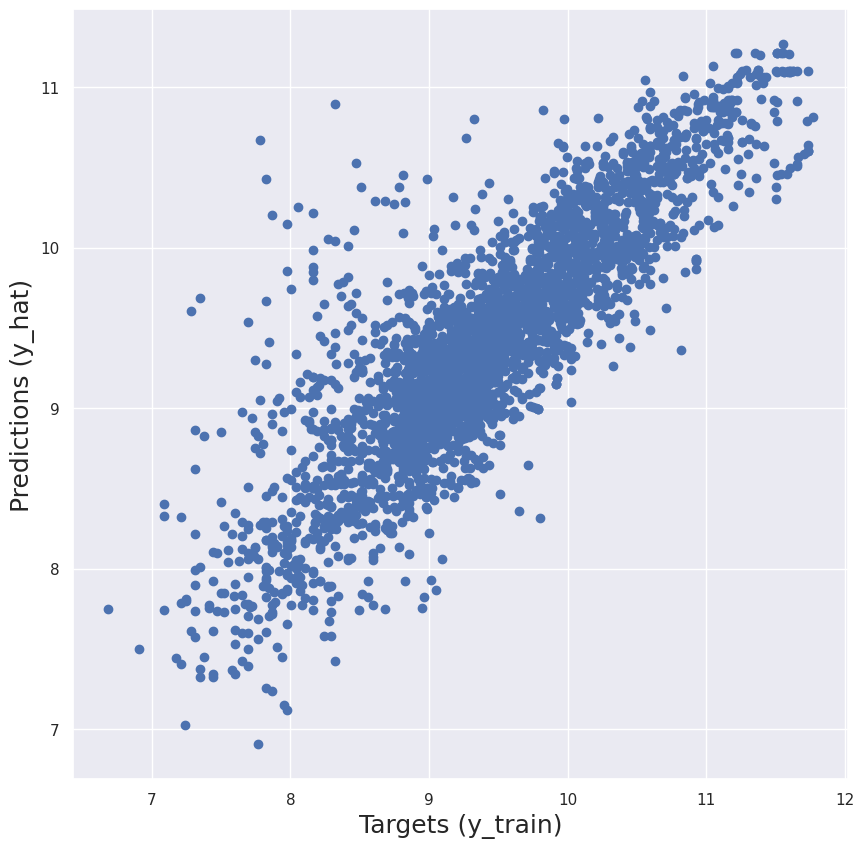

In [48]:
plt.figure(figsize=(10,10))
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

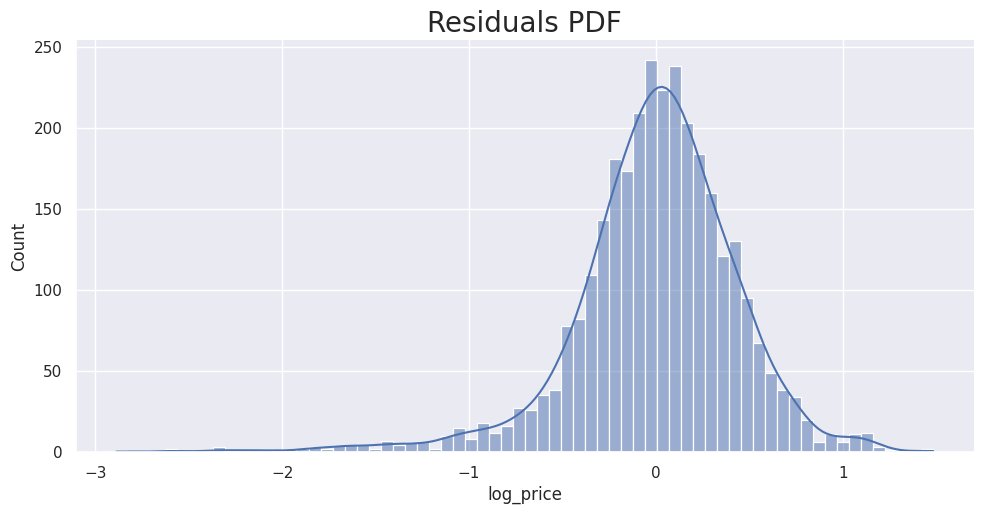

In [49]:
sns.displot(y_train-y_hat,height=5,aspect=2,kde=True)
plt.title('Residuals PDF',size=20)

In [50]:
reg.score(x_train,y_train)

0.744996578792662

## Finding the weights and bias

In [51]:
reg.coef_

array([-0.44871341,  0.20903483,  0.03873566,  0.0324979 , -0.52381377,
       -0.57111309, -0.18076831, -0.2173311 , -0.5882892 , -0.34486661,
       -0.41347478, -0.44050048, -0.46254013, -0.34320264, -0.21126668,
       -0.30601747,  1.1001902 ])

In [52]:
reg.intercept_

9.090831958795784

In [53]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=['Feature'])
reg_summary['Weights']=reg.coef_
reg_summary

,Feature,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.038736
3,Brand_Mercedes-Benz,0.032498
4,Brand_Mitsubishi,-0.523814
5,Brand_Renault,-0.571113
6,Brand_Toyota,-0.180768
7,Brand_Volkswagen,-0.217331
8,Body_hatch,-0.588289
9,Body_other,-0.344867


In [54]:
data_cleaned_log_price['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## Testing

In [55]:
y_hat_test=reg.predict(x_test)

Text(0, 0.5, 'Predictions (y_hat_test)')

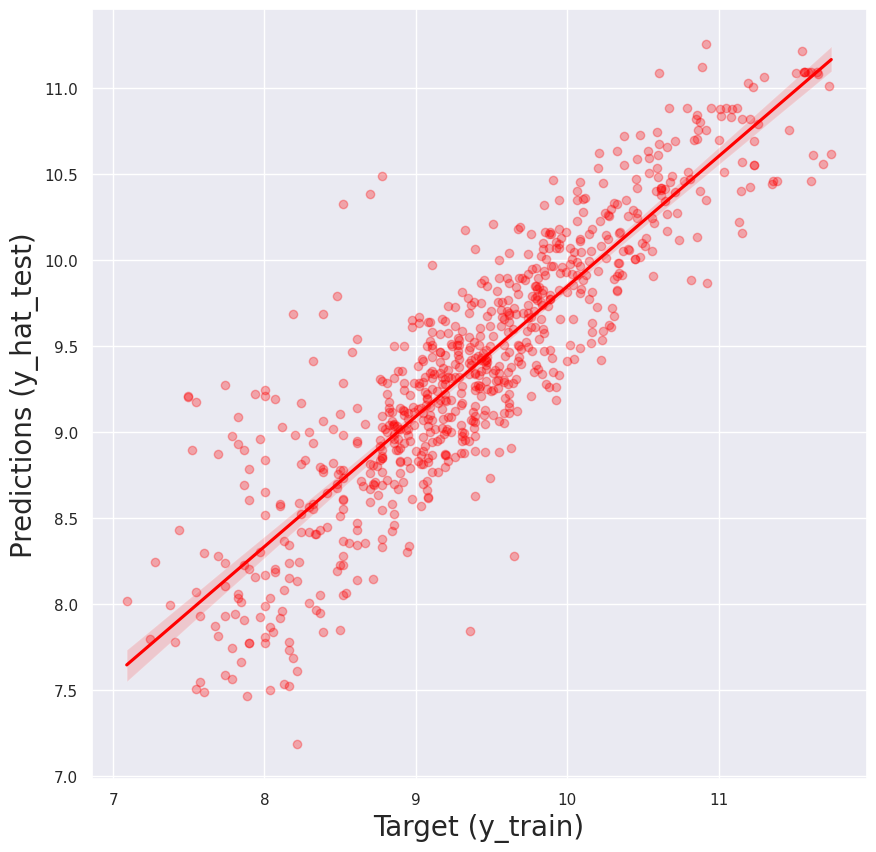

In [56]:
# Plot test value with best fitted line
plt.figure(figsize=(10,10))
p=sns.regplot(x=y_test,y=y_hat_test,color='red',scatter_kws={'alpha':0.3})
p.set_xlabel('Target (y_train)',fontsize=20)
p.set_ylabel('Predictions (y_hat_test)',fontsize=20)

In [57]:
df_pf=pd.DataFrame(np.exp(y_hat_test),columns=['Predictions'])
df_pf.head()

,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [58]:
y_test=y_test.reset_index(drop=True)
df_pf['Target']=np.exp(y_test)
df_pf

,Predictions,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [59]:
df_pf['Residuals']=df_pf['Target']-df_pf['Predictions']

In [60]:
df_pf['Difference%']=np.absolute(df_pf['Residuals']/df_pf['Target']*100)
df_pf

,Predictions,Target,Residuals,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [61]:
df_pf.describe()

,Predictions,Target,Residuals,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [62]:
# Check each prediction and deviation of prediction with true target
pd.options.display.max_rows=50
pd.set_option('display.float_format',lambda x:'%.2f' %x)
df_pf.sort_values(by=['Difference%'])

,Predictions,Target,Residuals,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
...,...,...,...,...
657,32481.05,6000.00,-26481.05,441.35
162,9954.42,1800.00,-8154.42,453.02
451,35956.50,6500.00,-29456.50,453.18
532,10019.90,1800.00,-8219.90,456.66
